<a href="https://colab.research.google.com/github/Gayatri-K/review_sentiment_analysis/blob/b%C3%A1sica/review_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

In [0]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [0]:
encoder = info.features['text'].encoder

In [31]:
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [32]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [0]:
assert original_string == sample_string

In [34]:
for index in encoded_string:
  print('{} ----> {}'.format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [0]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)

test_dataset = test_dataset.padded_batch(BATCH_SIZE)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [0]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [39]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 45s 114ms/step - loss: 0.6986 - accuracy: 0.5000 - val_loss: 0.6889 - val_accuracy: 0.4917
Epoch 2/10
391/391 [==============================] - 44s 113ms/step - loss: 0.6874 - accuracy: 0.5116 - val_loss: 0.6931 - val_accuracy: 0.4917
Epoch 3/10
391/391 [==============================] - 44s 113ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.4917
Epoch 4/10
391/391 [==============================] - 45s 114ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.4917
Epoch 5/10
391/391 [==============================] - 44s 113ms/step - loss: 0.6337 - accuracy: 0.6938 - val_loss: 0.5962 - val_accuracy: 0.7807
Epoch 6/10
391/391 [==============================] - 45s 114ms/step - loss: 0.5953 - accuracy: 0.7893 - val_loss: 0.5921 - val_accuracy: 0.7953
Epoch 7/10
391/391 [==============================] - 45s 116ms/step - loss: 0.5792 - accuracy: 0.8352 - val_loss: 0.5839 - val_ac

In [40]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 19s 50ms/step - loss: 0.5758 - accuracy: 0.8354
Test Loss: 0.5758383870124817
Test Accuracy: 0.8353999853134155


In [0]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [0]:
def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

In [43]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)*100
print('probability that this is a positive review : ', predictions)

probability that this is a positive review :  [[54.936726]]


In [44]:
# predict on a sample text with padding

sample_pred_text = ('I hate the movie very much and very bad')
predictions = sample_predict(sample_pred_text, pad=True) * 100
print('probability that this is a positive review : ', predictions)



probability that this is a positive review :  [[46.354694]]


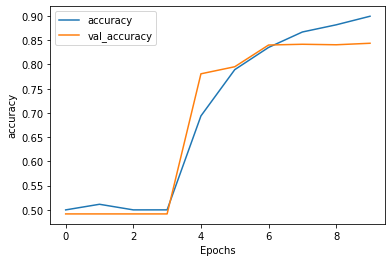

In [45]:
plot_graphs(history, 'accuracy')

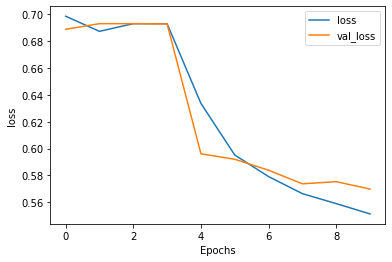

In [46]:
plot_graphs(history, 'loss')

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [50]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 76s 196ms/step - loss: 0.6992 - accuracy: 0.4996 - val_loss: 0.6931 - val_accuracy: 0.4917
Epoch 2/10
391/391 [==============================] - 76s 194ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.4917
Epoch 3/10
391/391 [==============================] - 77s 198ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.4917
Epoch 4/10
391/391 [==============================] - 78s 199ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.4917
Epoch 5/10
391/391 [==============================] - 77s 197ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.4917
Epoch 6/10
391/391 [==============================] - 76s 195ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.4917
Epoch 7/10
391/391 [==============================] - 77s 196ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_ac

KeyboardInterrupt: ignored

In [51]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 36s 93ms/step - loss: 0.6931 - accuracy: 0.5000
Test Loss: 0.6931473612785339
Test Accuracy: 0.5


In [52]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was not good at all. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)*100
print('probability that this is a positive review : ', predictions)

probability that this is a positive review :  [[6.290531]]


In [53]:
# predict on a sample text with padding

sample_pred_text = ('The movie was good. The animation and the graphics '
                    'were awesome. I would recommend this movie to all.')
predictions = sample_predict(sample_pred_text, pad=True)*100
print('probability that this is a positive review : ', predictions)

probability that this is a positive review :  [[0.03990094]]


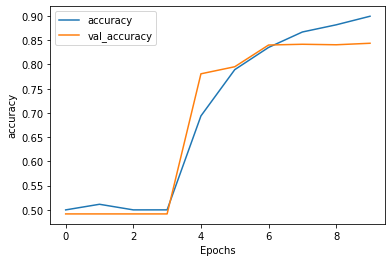

In [54]:
plot_graphs(history, 'accuracy')

In [0]:
plot_graphs(history, 'loss')